# Homework Python Programming for data analytics III
by **Randy Galawana**
<br>4 November 2019

Titanic

This is one of many competitions that Kaggle provided. As we know, the sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. The purpose of this challenge is to complete the analysis of what sorts of people were likely to survive or in particular is to apply the tools of machine learning to predict which passengers survived the tragedy.

Link from Kaggle: https://www.kaggle.com/c/titanic

## Load DataSet

In [326]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

df = pd.read_csv('csv/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Getting Insight Data

### Describe

In [327]:
df.describe(percentiles=[0.25,0.5,0.75,0.9]).T

,count,mean,std,min,25%,50%,75%,90%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,802.0000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,50.0000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,1.0000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,2.0000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,77.9583,512.3292


### Check Data Columns Info

In [328]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [329]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


**note that Embarked, Age and Cabin has Null Values**

In [330]:
count_null = df.isna().sum()
count_null[count_null>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

**Most of Cabin is Unknown, so we will drop this column later, and Age has 177 Unknown, while Embarked only has 2 value unknown**

### check distribution of Age

C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


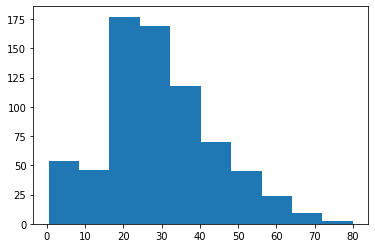

In [331]:
plt.hist(df['Age'])
plt.show()

### fill Age with median, drop Cabin and fill Embarked with modus

In [332]:
# Fill NAN Age with Median
median_age = df['Age'].median(axis=0)
df['Age'] = df['Age'].fillna(median_age)

# Fill NAN Embarked with modus
import statistics as st
modus_emb = st.mode(df['Embarked'])
df['Embarked'] = df['Embarked'].fillna(modus_emb)

# Drop Cabin
df_clean = df.drop('Cabin',axis=1)
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Check Duplicated Passenger

In [333]:
df_clean[df_clean.duplicated(subset='PassengerId')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


### Rename Survived, Embarked, Pclass column to categorical

In [334]:
# Rename Survived
df_clean['Survived'] = np.where(df['Survived']==1, 'Yes', 'No')

# Rename Embarked
def emb_category(x):
    port = 'Southampton'
    if (x == 'C'):
        port = 'Cherbourg'
    elif (x == 'Q'):
        port = 'Queenstown'
    else:
        port = 'Southampton'
    return port

df_clean['Embarked'] = df_clean['Embarked'].apply(emb_category)

# Rename Pclass
def pclass(x):
    cls = '3rd'
    if (x == 1):
        cls = '1st'
    elif (x == 2):
        cls = '2nd'
    else:
        cls = '3rd'
    return cls

df_clean['Pclass'] = df_clean['Pclass'].apply(pclass)

df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,Yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,Yes,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,Yes,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,5,No,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton


## Summarize Data

### grouping by Sex

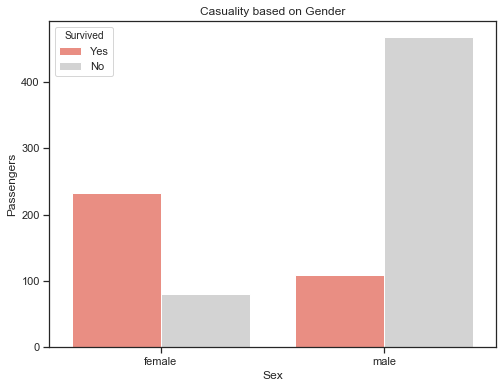

In [382]:
fig, ax = plt.subplots(figsize=(8, 6))

summary_sex = df_clean.groupby(['Sex','Survived'])['PassengerId'].nunique().reset_index(name='Passengers')
g = sns.barplot(x="Sex", y="Passengers", hue="Survived", data=summary_sex, palette={'salmon','lightgray'}, hue_order={'Yes','No'}, ax=ax)
ax.set_title('Casuality based on Gender')

fig.savefig('fig/titanic_victims_based_on_gender.png')

Most casuality is Male, while most of female passenger survive

### Gruping by Age

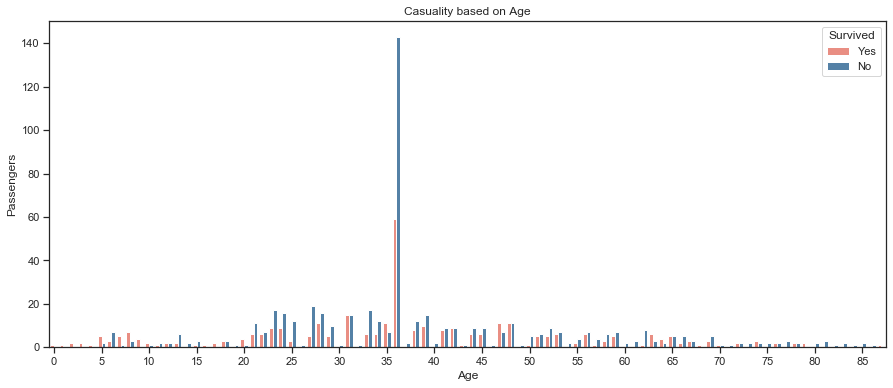

In [385]:
fig, ax = plt.subplots(figsize=(15, 6))

summary_age = df_clean.groupby(['Age','Survived'])['PassengerId'].nunique().reset_index(name='Passengers')
g = sns.barplot(x="Age", y="Passengers", hue="Survived", data=summary_age, palette={'salmon','steelblue'}, ax=ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.legend(loc='upper right',title='Survived')
ax.set_title('Casuality based on Age')

fig.savefig('fig/titanic_victims_based_on_age.png')

Most victims comes from Age 20 to 50, And highest on age 36

### Get Summary Distribution by Age and Sex

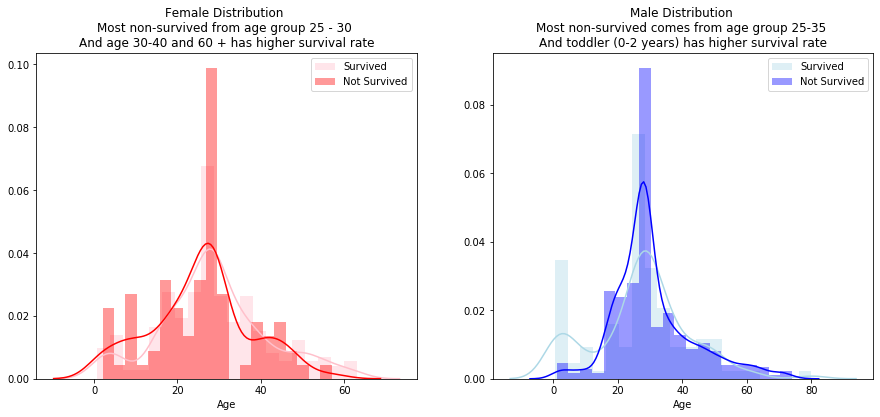

In [337]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))

female = df_clean[df_clean['Sex']=='female']
male = df_clean[df_clean['Sex']=='male']

# female distribution survived and not
g = sns.distplot(female[female['Survived']=='Yes'].Age, bins=20, label='Survived', color='pink', ax=ax1)
g = sns.distplot(female[female['Survived']=='No'].Age, bins=20, label='Not Survived', color='red', ax=ax1)
ax1.set_title('''Female Distribution 
Most non-survived from age group 25 - 30 
And age 30-40 and 60 + has higher survival rate''')
ax1.legend(loc='upper right')
#
h = sns.distplot(male[male['Survived']=='Yes'].Age, bins=20, label='Survived', color='lightblue', ax=ax2)
h = sns.distplot(male[male['Survived']=='No'].Age, bins=20, label='Not Survived', color='blue', ax=ax2)
ax2.set_title('''Male Distribution 
Most non-survived comes from age group 25-35 
And toddler (0-2 years) has higher survival rate''')
ax2.legend(loc='upper right')

fig.savefig('fig/titanic_victims_distribution_age_gender.png')

### Get summary Age and Fare

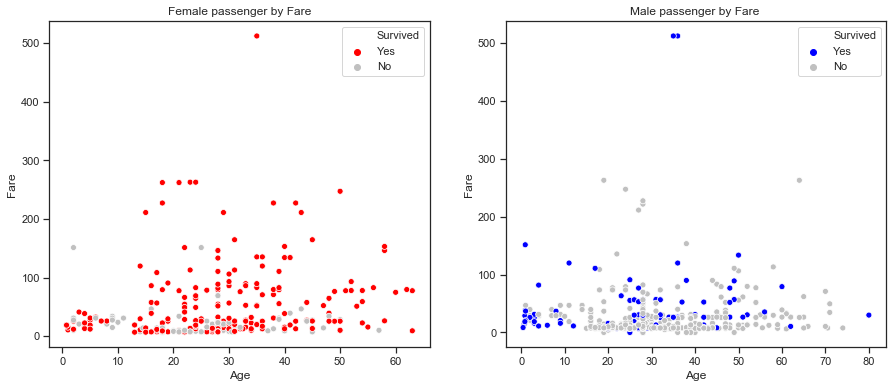

In [404]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))

female = df_clean[df_clean['Sex']=='female']
male = df_clean[df_clean['Sex']=='male']

g = sns.scatterplot(x='Age', y='Fare', hue='Survived', data=female, ax=axes[0], palette={'No':'silver','Yes':'red'}, hue_order={'Yes','No'})
g = sns.scatterplot(x='Age', y='Fare', hue='Survived', data=male, ax=axes[1], palette={'No':'silver','Yes':'blue'}, hue_order={'Yes','No'})

axes[0].set_title('''Female passenger by Fare''')
axes[1].set_title('''Male passenger by Fare ''')

fig.savefig('fig/titanic_victims_scatter_age_fare.png')

most of female passenger survive pays more, while male passenger fare isn't deciding factor to survive, in exception outliers (500 +)

### Get insight on Pclass and embarked

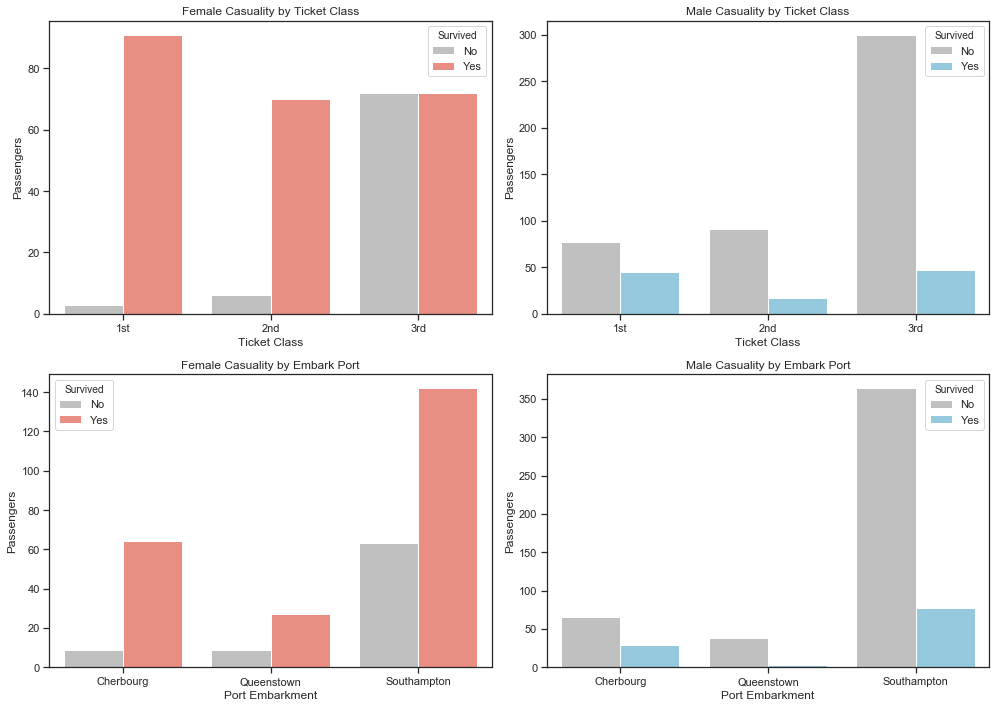

In [412]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14, 10));

female = df_clean[df_clean['Sex']=='female']
male = df_clean[df_clean['Sex']=='male']

# female summary
pclass_female = female.groupby(['Pclass','Survived'])['PassengerId'].nunique().reset_index(name='Passengers')
embarked_female = female.groupby(['Embarked','Survived'])['PassengerId'].nunique().reset_index(name='Passengers')

# male summary
pclass_male = male.groupby(['Pclass','Survived'])['PassengerId'].nunique().reset_index(name='Passengers')
embarked_male = male.groupby(['Embarked','Survived'])['PassengerId'].nunique().reset_index(name='Passengers')

g = sns.barplot(x='Pclass', y='Passengers', hue='Survived', data=pclass_female, ax=axes[0,0], palette={'No':'silver','Yes':'salmon'}, )
axes[0,0].set_xlabel('Ticket Class')
axes[0,0].set_title('Female Casuality by Ticket Class')

h = sns.barplot(x='Pclass', y='Passengers', hue='Survived', data=pclass_male, ax=axes[0,1], palette={'No':'silver','Yes':'skyblue'})
axes[0,1].set_xlabel('Ticket Class')
axes[0,1].set_title('Male Casuality by Ticket Class')

i = sns.barplot(x='Embarked', y='Passengers', hue='Survived', data=embarked_female, ax=axes[1,0], palette={'No':'silver','Yes':'salmon'})
axes[1,0].set_xlabel('Port Embarkment')
axes[1,0].set_title('Female Casuality by Embark Port')

j = sns.barplot(x='Embarked', y='Passengers', hue='Survived', data=embarked_male, ax=axes[1,1], palette={'No':'silver','Yes':'skyblue'})
axes[1,1].set_xlabel('Port Embarkment')
axes[1,1].set_title('Male Casuality by Embark Port')

fig.tight_layout()

fig.savefig('fig/titanic_victims_based_on_ticket_class_port_embarkment.png')

Most women survived from 1st class ticket, while 3rd class ticket contributed highest casualities both on male and female.
<br>both male and female depart from southampton are likely to survive

### Familial connection to survivability

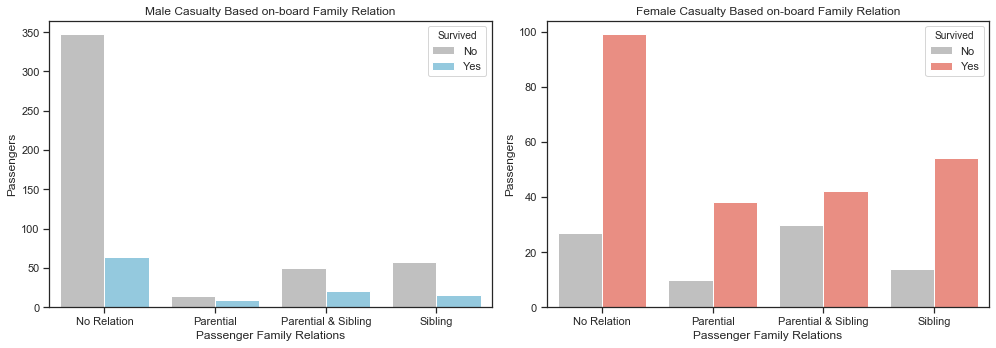

In [483]:
def familial(x):
    relation = 'No Relation'
    if (x['SibSp'] > 0 and x['Parch'] > 0):
        relation = 'Parential & Sibling'
    elif (x['SibSp'] > 0):
        relation = 'Sibling'
    elif (x['Parch'] > 0):
        relation = 'Parential'
    else :
        relation = 'No Relation'
    return relation

# Get Familial relation
df_clean['Familial'] = df.apply(familial,axis=1)

# familial summary
family_sum = df_clean.groupby(['Sex','Familial','Survived'])['PassengerId'].nunique().reset_index(name='Passengers')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14, 5));
g = sns.barplot(x='Familial', y='Passengers', hue='Survived', data=family_sum[family_sum['Sex']=='male'], ax=axes[0], palette={'No':'silver','Yes':'skyblue'}, )
axes[0].set_title('Male Casualty Based on-board Family Relation')
axes[0].set_xlabel('Passenger Family Relations')
h = sns.barplot(x='Familial', y='Passengers', hue='Survived', data=family_sum[family_sum['Sex']=='female'], ax=axes[1], palette={'No':'silver','Yes':'salmon'}, )
axes[1].set_title('Female Casualty Based on-board Family Relation')
axes[1].set_xlabel('Passenger Family Relations')

fig.tight_layout()

fig.savefig('fig/titanic_victims_based_on_family_relationship.png')

Most Male casualties higher when there is no famillial relationship with others passenger, while female casualties higher when there is connection both as parent-child and siblings.

### Calculate Survival Rate

In [469]:
survivability = df_clean.groupby(['Sex','Familial']).agg({'Survived':lambda x : (x=='Yes').sum() / x.count()}).reset_index()


,Sex,Familial,Survived
0,female,No Relation,0.785714
1,female,Parential,0.791667
2,female,Parential & Sibling,0.583333
3,female,Sibling,0.794118
4,male,No Relation,0.155718
5,male,Parential,0.391304
6,male,Parential & Sibling,0.285714
7,male,Sibling,0.219178


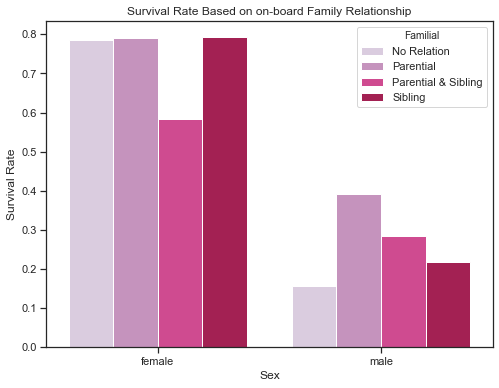

In [484]:
fig, ax = plt.subplots(figsize=(8, 6))

g = sns.barplot(x='Sex', y='Survived', hue='Familial', ax=ax, data=survivability, palette='PuRd')
ax.set_title('Survival Rate Based on on-board Family Relationship')
ax.set_ylabel('Survival Rate')

fig.savefig('fig/titanic_survivalrate_based_on_family_relationship.png')

Woman survivability is high despite different family connection with others passenger, except female that has both parent/child and sibling relation have lower survival rate
<br>Man survival rate lowest when has no family connection with others passenger, and slighty better when he has siblings, parent/child on boards.